In [405]:
import networkx as nx
import random
from collections import Counter
import numpy as np
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
from NEMtropy import matrix_generator as mg
import os
import matplotlib.pyplot as plt
import pickle

In [409]:
import sys
print(sys.version)
print(sys.executable)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
/Users/qiguo/opt/anaconda3/bin/python


In [410]:
path="/Users/qiguo/Documents/01 UZH/03 2022 Fall/01 Network Science/01 Assignments/08/Critical-Airline-Analysis-for-Pandemic/Data_initalization/"

In [411]:
G = nx.erdos_renyi_graph(10, 0.4, seed=None, directed=True)

In [412]:
nx.degree_centrality(G)

{0: 0.5555555555555556,
 1: 1.0,
 2: 0.7777777777777777,
 3: 0.8888888888888888,
 4: 0.6666666666666666,
 5: 1.222222222222222,
 6: 0.3333333333333333,
 7: 0.7777777777777777,
 8: 1.0,
 9: 0.7777777777777777}

In [413]:
nx.in_degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.5555555555555556,
 2: 0.5555555555555556,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.6666666666666666,
 6: 0.2222222222222222,
 7: 0.3333333333333333,
 8: 0.4444444444444444,
 9: 0.2222222222222222}

In [414]:
nx.out_degree_centrality(G)

{0: 0.1111111111111111,
 1: 0.4444444444444444,
 2: 0.2222222222222222,
 3: 0.5555555555555556,
 4: 0.4444444444444444,
 5: 0.5555555555555556,
 6: 0.1111111111111111,
 7: 0.4444444444444444,
 8: 0.5555555555555556,
 9: 0.5555555555555556}

In [415]:
# G=nx.DiGraph()
# for u, v in nx.barabasi_albert_graph(10,3,seed=1).edges():
#     G.add_edge(u,v,weight=random.uniform(0,0.6))

In [416]:
#nx.draw(G, label=True)

In [417]:
#G.edges.data("weight", default=None)

### Degree Centrality Methods

In [418]:
#nx.degree_centrality(G)

In [419]:
def degree_centrality(g, rk):
    sorted_deg_cent=sorted(nx.degree_centrality(g), key=nx.degree_centrality(g).get, reverse=True)
    return sorted_deg_cent[:rk]

In [420]:
degree_centrality(G,3)

[5, 1, 8]

### Betweenness Centrality Methods

In [421]:
def betweenness_centrality(g, rk):
    sorted_betweenness_centrality = sorted(nx.betweenness_centrality(g, weight="weight"), key=nx.betweenness_centrality(g, weight="weight").get, reverse=True)
    return sorted_betweenness_centrality[:rk]

In [422]:
betweenness_centrality(G,3)

[5, 7, 1]

### Closeness Centrality Methods

In [423]:
def closeness_centrality(g, rk):
    sorted_closeness_centrality = sorted(nx.closeness_centrality(g), key=nx.closeness_centrality(g).get, reverse=True)
    return sorted_closeness_centrality[:rk]

In [424]:
closeness_centrality(G,3)

[1, 2, 5]

### Eigenvector Centrality Methods

In [425]:
def eigenvector_centrality(g,rk):
    sorted_eigenvector_centrality = sorted(nx.eigenvector_centrality(g, weight="weight", max_iter=100000), key=nx.eigenvector_centrality(g, weight="weight", max_iter=100000).get, reverse=True)
    return sorted_eigenvector_centrality[:rk]

In [426]:
eigenvector_centrality(G,3)

[5, 2, 1]

### PageRank Methods

In [427]:
def page_rank(g,rk):
    sorted_pagerank = sorted(nx.pagerank(g, weight='weight'), key=nx.pagerank(g, weight='weight').get, reverse=True)
    return sorted_pagerank[:rk]

In [428]:
page_rank(G,3)

[5, 7, 2]

### H-index Methods

If at most n edges with a weight of not less than n are connected to a node, then its H-index is n. The H-index method can be applied to a weighted network. To some extent, the H-index can be regarded as a compromise between the strength of the node and the degree of centrality. However, this method has a huge drawback, that is, the value of the edge weight needs to be in the appropriate range, otherwise the effective rankings cannot be obtained.

In [429]:
def h_index(g,rk):
    h_hindex={}
    for i in g.nodes():
        sorted_neighbor_degrees = sorted((g.degree(v) for v in g.neighbors(i)), reverse=True)
        for j in range(1, len(sorted_neighbor_degrees)+1):
            if sorted_neighbor_degrees[j-1] < j:
                break
        h_hindex[i]=j
    h_hindex=sorted(h_hindex.items(), key=lambda x: x[1], reverse=True)
    top_node=[]
    for i in range(rk):    
        top_node.append(h_hindex[i][0])
    return top_node

In [430]:
print(hindex(G))

{0: 1, 1: 4, 2: 2, 3: 5, 4: 4, 5: 5, 6: 1, 7: 4, 8: 5, 9: 5}


In [580]:
def hindex(g):
    h_hindex={}
    for i in g.nodes():
        sorted_neighbor_degrees = sorted((g.degree(v) for v in g.neighbors(i)), reverse=True)
        for j in range(1, len(sorted_neighbor_degrees)+1):
            if sorted_neighbor_degrees[j-1] < j:
                break
        h_hindex[i]=j
    return h_hindex

In [432]:
# def hindex(g, n):
#     sorted_neighbor_degrees = sorted((g.degree(v) for v in g.neighbors(n)), reverse=True)
#     h = 0
#     for i in range(1, len(sorted_neighbor_degrees)+1):
#         if sorted_neighbor_degrees[i-1] < i:
#             break
#         h = i
#     return h

In [433]:
h_hindex={}
for i in G.nodes():
    h_hindex[i]=hindex(G, i)

In [434]:
h_hindex = sorted(h_hindex.items(), key=lambda x: x[1], reverse=True)

In [435]:
#h_hindex

In [436]:
# Print the most influential node--the highest eigenvector centrality
print("The most influential node is:", h_hindex[0][0])

#Print Top 3
print("The top 3 influential nodes are: ", h_hindex[0][0],h_hindex[1][0],h_hindex[2][0])

The most influential node is: 8
The top 3 influential nodes are:  8 9 1


In [437]:
# Undirected Comparison
ug = G.to_undirected()
ug_h_hindex={}
for i in ug.nodes():
    ug_h_hindex[i]=hindex(ug, i)
ug_h_hindex = sorted(ug_h_hindex.items(), key=lambda x: x[1], reverse=True)

# Print the most influential node--the highest eigenvector centrality
print("The most influential node is:", ug_h_hindex[0][0])

#Print Top 3
print("The top 3 influential nodes are: ", ug_h_hindex[0][0],ug_h_hindex[1][0],ug_h_hindex[2][0])

The most influential node is: 1
The top 3 influential nodes are:  1 2 3


### HITs Methods

In [438]:
def hits(g, rk):
    sorted_hits_hub = sorted(dict(nx.hits(g)[0]), key=dict(nx.hits(g)[0]).get, reverse = True)
    sorted_hits_aut = sorted(dict(nx.hits(g)[1]), key=dict(nx.hits(g)[1]).get, reverse = True)
    return sorted_hits_hub[:rk], sorted_hits_aut[:rk]

In [439]:
hits(G,3)

([9, 8, 3], [2, 1, 5])

### K-Shell Methods

Nodes are assigned to k shells according to their remaining degree, which is obtained by successive pruning of nodes with degree
smaller than the kS value of the current layer. We start by removing all nodes with degree k=1. After removing all the nodes with k=1, some nodes may be left with one link, so we continue pruning the system iteratively until there is no node left with k=1 in the network. The removed nodes, along with the corresponding links, form a k shell with index k_S=1. In a similar fashion, we iteratively remove the next k shell, k_S=2, and continue removing higher-k shells until all nodes are removed. As a result, each node is associated with one k_S index, and the network can be viewed as the union of all k shells. The resulting classification of a node can be very different than when the degree k is used.

#### Flight network is not a hierarchical structure, the result may be none after remove the first shell.
The k-shell decomposition method has low computational complexity and has many applications in analyzing the hierarchical structure of large-scale networks. However, this method also has certain limitations. For example, it does not apply to rule networks and BA networks, and also makes it difficult to distinguish between the influence of nodes in the same layer because the rankings are too coarse.

In [440]:
def k_shell(g,k):
    g_ks=nx.k_shell(g, k=k)
    return g_ks.nodes()

In [443]:
k_shells = nx.k_shell(G_init, k=1)

In [444]:
print(k_shells.nodes())

[376, 185, 351]


In [170]:
#nx.draw(G, with_labels=True)

In [171]:
#nx.draw(k_shells,with_labels=True)

### GLS

In [446]:
def gls_rk(g,rk):
    # Compute the Global influence
    neighbors = []
    A = 1.1
    # num_nodes
    N = 0
    glbinflu = {}
    count_neighbors={}
    for i in g.nodes():
        N += 1
    for node1 in g.nodes():
        for node2 in g.nodes():
            #print(node1,node2)
            if node1 != node2:
                # Use the common_neighbors method to find the common neighbors
                in_neighbors = list(g.predecessors(node2))
                if len(in_neighbors) > 1:
                    neighbors = in_neighbors
                count_neighbors = Counter(neighbors)
                #print(count_neighbors)
                
            # Calculate global influence
            n2 = int(node2)
            degree2 = g.degree[n2]
            sum_pow = 0
            #count_neighbors = dict(count_neighbors)
            for v in count_neighbors.values():
                sum_pow += pow(A, v)
            glbinflu_2 = degree2 * sum_pow
            glbinflu[n2] = glbinflu_2
    
    # Compute the local influence
    # Compute the sum of degree in the Graph
    nodes = [i for i in g.nodes()]
    degrees = [g.degree(i) for i in nodes]
    sum_degree = 0
    for i in degrees:
        sum_degree += i

    locinflu = {}
    for node3 in g.nodes():
        # Get a list of the nearest neighbors
        Nei = nx.neighbors(g,node3)
        n3 = int(node3)
        degree3 = g.degree[n3]
        
        for m in Nei:
            degree_m = g.degree(m)
            # Calculate the Degree Centrality
            DC_m = degree_m/(N-1)
            degree_m = g.degree[m]
            # Calculate the average degree
            averD_m = (sum_degree - degree_m)/degree_m
            # Calculate contribution probability
            p_m = 1/averD_m
            # Calculate local influence
            locinflu_n = 0
            pre_loc = DC_m * p_m
            locinflu_n += pre_loc 
            locinflu[n3] = locinflu_n
            
    Influ = {}
#     for key in glbinflu:
#         Influ[key]=[]
    # Iterate over the keys in glb
    for key in glbinflu:
        if key in locinflu:
            Influ[key] = glbinflu[key] * locinflu[key]
        else:
            pass
        
    sorted_Influ = sorted(Influ, key=Influ.get, reverse=True)
    
    return sorted_Influ[:rk]

In [447]:
gls_rk(G_init,3)

[277, 206, 235]

In [448]:
def gls(g):
    # Compute the Global influence
    neighbors = []
    A = 1.1
    # num_nodes
    N = 0
    glbinflu = {}
    count_neighbors={}
    for i in g.nodes():
        N += 1
    for node1 in g.nodes():
        for node2 in g.nodes():
            #print(node1,node2)
            if node1 != node2:
                # Use the common_neighbors method to find the common neighbors
                in_neighbors = list(g.predecessors(node2))
                if len(in_neighbors) > 1:
                    neighbors = in_neighbors
                count_neighbors = Counter(neighbors)
                #print(count_neighbors)
                
            # Calculate global influence
            n2 = int(node2)
            degree2 = g.degree[n2]
            sum_pow = 0
            #count_neighbors = dict(count_neighbors)
            for v in count_neighbors.values():
                sum_pow += pow(A, v)
            glbinflu_2 = degree2 * sum_pow
            glbinflu[n2] = glbinflu_2
    
    # Compute the local influence
    # Compute the sum of degree in the Graph
    nodes = [i for i in g.nodes()]
    degrees = [g.degree(i) for i in nodes]
    sum_degree = 0
    for i in degrees:
        sum_degree += i

    locinflu = {}
    for node3 in g.nodes():
        # Get a list of the nearest neighbors
        Nei = nx.neighbors(g,node3)
        n3 = int(node3)
        degree3 = g.degree[n3]
        
        for m in Nei:
            degree_m = g.degree(m)
            # Calculate the Degree Centrality
            DC_m = degree_m/(N-1)
            degree_m = g.degree[m]
            # Calculate the average degree
            averD_m = (sum_degree - degree_m)/degree_m
            # Calculate contribution probability
            p_m = 1/averD_m
            # Calculate local influence
            locinflu_n = 0
            pre_loc = DC_m * p_m
            locinflu_n += pre_loc 
            locinflu[n3] = locinflu_n
            
    Influ = {}
#     for key in glbinflu:
#         Influ[key]=[]
    # Iterate over the keys in glb
    for key in glbinflu:
        if key in locinflu:
            Influ[key] = glbinflu[key] * locinflu[key]
        else:
            Influ[key]=0
        
    #sorted_Influ = sorted(Influ, key=Influ.get, reverse=True)
    
    return Influ

In [449]:
gls(G)

{0: 1.8427350427350426,
 1: 7.071428571428571,
 2: 3.2247863247863244,
 3: 3.7714285714285714,
 4: 1.8857142857142857,
 5: 6.08102564102564,
 6: 1.4546448087431696,
 7: 2.566666666666667,
 8: 3.316923076923077,
 9: 4.4}

## Analysis

In [450]:
def Analysis_G(g,rk):
    degree_centrality_topNodes=degree_centrality(g, rk)
    betweenness_centrality_topNodes=betweenness_centrality(g, rk)
    closeness_centrality_topNodes=closeness_centrality(g, rk)
    eigenvector_centrality_topNodes=eigenvector_centrality(g,rk)
    page_rank_topNodes=page_rank(g,rk)
    h_index_topNodes=h_index(g,rk)
    hits_h_topNodes,hits_a_topNodes=hits(g, rk)
    gls_topNodes=gls_rk(g,rk)
    return degree_centrality_topNodes,betweenness_centrality_topNodes,closeness_centrality_topNodes,eigenvector_centrality_topNodes,page_rank_topNodes,h_index_topNodes,hits_h_topNodes,hits_a_topNodes,gls_topNodes
    #return ("degree_centrality",degree_centrality_topNodes, "betweenness_centrality",betweenness_centrality_topNodes,"closeness_centrality",closeness_centrality_topNodes,"eigenvector_centrality",eigenvector_centrality_topNodes,"page_rank",page_rank_topNodes,"h_index",h_index_topNodes,"hits",hits_topNodes,"gls",gls)

In [451]:
#Analysis_G(G,3)

In [593]:
degree_centrality_topNodes,betweenness_centrality_topNodes,closeness_centrality_topNodes,eigenvector_centrality_topNodes,page_rank_topNodes,h_index_topNodes,hits_h_topNodes,hits_a_topNodes,gls_topNodes=Analysis_G(G_init,20)

In [604]:
print(get_label([75,339]))

['CMB', 'SIN']


In [594]:
print("degree_centrality: ",degree_centrality_topNodes,"\n"+"betweenness_centrality:",betweenness_centrality_topNodes,"\n"+"closeness_centrality:",closeness_centrality_topNodes,"\n"+"eigenvector_centrality:",eigenvector_centrality_topNodes,"\n"+"page_rank:",page_rank_topNodes,"\n"+"h_index:",h_index_topNodes,"\n"+"hits_hub:",hits_h_topNodes,"\n"+"hits_aut:",hits_a_topNodes,"\n"+"gls:",gls_topNodes)

degree_centrality:  [277, 206, 222, 235, 154, 356, 150, 198, 33, 265, 173, 15, 205, 327, 53, 362, 156, 51, 48, 209] 
betweenness_centrality: [15, 33, 154, 222, 327, 277, 150, 235, 51, 356, 309, 423, 156, 53, 279, 212, 265, 362, 209, 173] 
closeness_centrality: [206, 173, 277, 222, 198, 235, 127, 33, 15, 154, 265, 63, 51, 421, 334, 150, 362, 233, 327, 16] 
eigenvector_centrality: [154, 206, 362, 265, 173, 198, 385, 231, 305, 277, 235, 48, 334, 339, 286, 222, 288, 242, 51, 156] 
page_rank: [206, 277, 235, 154, 222, 156, 198, 362, 173, 327, 265, 150, 205, 356, 231, 48, 209, 33, 204, 51] 
h_index: [277, 198, 235, 206, 173, 154, 356, 222, 265, 362, 51, 33, 15, 150, 227, 327, 29, 97, 47, 204] 
hits_hub: [154, 206, 362, 385, 265, 173, 198, 305, 231, 277, 339, 235, 48, 42, 334, 286, 222, 242, 288, 156] 
hits_aut: [154, 206, 362, 265, 173, 198, 231, 385, 305, 277, 235, 48, 334, 339, 286, 222, 288, 51, 242, 156] 
gls: [277, 206, 235, 63, 154, 421, 98, 143, 227, 3, 198, 173, 324, 52, 113, 249, 5,

In [603]:
print(get_label([277, 206, 222, 235, 154, 356, 150, 198, 33, 265, 173, 15, 205, 327, 53, 362, 156, 51, 48, 209]))

['ORD', 'LHR', 'MAD', 'MIA', 'HKG', 'STL', 'HEL', 'LAX', 'BCN', 'NRT', 'JFK', 'AMM', 'LGW', 'SCL', 'BUD', 'SYD', 'HND', 'BOS', 'BNE', 'LIM']


In [ ]:
# start point: AAL->AAR
l=['LHR', 'HEL']

In [ ]:
# start point: 75 CMB-> 339 SIN
l=['LHR', 'HEL']

### Initial Network

In [454]:
g_file=np.load(os.path.join(path,'init_flight_capacity.npy'))

In [606]:
g_i_file=np.load(os.path.join(path,'matrix_after_i.npy'))

In [607]:
g_i_file.shape

(427, 427)

In [614]:
# Airline_after
G_after=nx.DiGraph()
for i in range(g_i_file.shape[0]):
    for j in range(g_i_file.shape[1]):
        if g_i_file[i,j]!=0:
            G_after.add_edge(i,j,weight=g_i_file[i,j])

In [615]:
# Airline
G_init=nx.DiGraph()
for i in range(g_file.shape[0]):
    for j in range(g_file.shape[1]):
        if g_file[i,j]!=0:
            G_init.add_edge(i,j,weight=g_file[i,j])

In [602]:
for i in range(g_file.shape[0]):
    for j in range(g_file.shape[1]):
        if g_file[i,j]!=0:
            print(i,j)

0 1
0 280
1 280
2 29
2 76
2 252
2 277
2 356
3 206
4 362
5 206
6 206
7 15
8 24
8 48
8 60
8 104
8 154
8 231
8 288
8 339
8 362
9 85
9 128
9 230
9 345
9 396
9 399
10 156
11 48
11 66
11 154
11 198
11 231
11 327
11 362
11 412
12 39
12 161
12 205
12 222
12 332
12 361
12 370
13 15
14 15
15 7
15 13
15 14
15 16
15 25
15 28
15 33
15 36
15 42
15 53
15 58
15 63
15 75
15 94
15 98
15 102
15 106
15 109
15 122
15 127
15 143
15 154
15 169
15 172
15 173
15 190
15 199
15 206
15 222
15 228
15 253
15 277
15 318
15 320
15 375
15 391
15 404
16 15
16 53
16 150
16 154
16 200
16 205
16 206
16 222
16 265
17 165
17 217
17 327
18 156
18 261
19 176
19 209
20 327
21 362
22 53
22 150
22 206
22 222
23 156
23 189
23 271
24 8
24 48
24 80
24 104
24 231
24 288
24 362
25 15
25 53
25 206
25 222
26 141
26 160
26 205
26 226
26 233
26 235
26 272
26 277
26 302
26 349
26 356
27 51
27 173
27 235
28 15
28 206
28 228
29 26
29 56
29 97
29 99
29 114
29 123
29 164
29 198
29 226
29 227
29 277
29 291
29 329
29 340
29 356
29 392
29 415
30

In [457]:
# Airport Name
with open(os.path.join(path,"terminal_name.txt")) as f:
    label_file=f.read().splitlines()

In [458]:
# all-0 airport
for i in label_file:
    if i=="BJX" or i=="SPI" or i=="KMG" or i=="TKN":
        print(i, label_file.index(i))

KMG 185
SPI 351
TKN 376


In [459]:
len(label_file)

427

In [460]:
tmp_result=Analysis_G(G_init,10)

In [491]:
tmp_result_top10=tmp_result

In [461]:
tmp_result

([277, 206, 222, 235, 154, 356, 150, 198, 33, 265],
 [15, 33, 154, 222, 327, 277, 150, 235, 51, 356],
 [206, 173, 277, 222, 198, 235, 127, 33, 15, 154],
 [154, 206, 362, 265, 173, 198, 385, 231, 305, 277],
 [206, 277, 235, 154, 222, 156, 198, 362, 173, 327],
 [277, 198, 235, 206, 173, 154, 356, 222, 265, 362],
 [154, 206, 362, 385, 265, 173, 198, 305, 231, 277],
 [154, 206, 362, 265, 173, 198, 231, 385, 305, 277],
 [277, 206, 235, 63, 154, 421, 98, 143, 227, 3])

In [492]:
tmp_result_top10

([277, 206, 222, 235, 154, 356, 150, 198, 33, 265],
 [15, 33, 154, 222, 327, 277, 150, 235, 51, 356],
 [206, 173, 277, 222, 198, 235, 127, 33, 15, 154],
 [154, 206, 362, 265, 173, 198, 385, 231, 305, 277],
 [206, 277, 235, 154, 222, 156, 198, 362, 173, 327],
 [277, 198, 235, 206, 173, 154, 356, 222, 265, 362],
 [154, 206, 362, 385, 265, 173, 198, 305, 231, 277],
 [154, 206, 362, 265, 173, 198, 231, 385, 305, 277],
 [277, 206, 235, 63, 154, 421, 98, 143, 227, 3])

In [462]:
def get_label(l):
    airp_label=[]
    for i in l:
        #print(i)
        airp_label.append(label_file[i])
    return airp_label

In [463]:
get_label([376, 185, 351])

['TKN', 'KMG', 'SPI']

In [493]:
def uniq_node_all(tmp_result):
    node_l=[]
    for i in tmp_result:
        for j in i:
            node_l.append(j)
    return set(node_l)

In [495]:
len(uniq_node_all(tmp_result))

26

In [496]:
# top 10 unique ratio
26/90

0.28888888888888886

In [464]:
def uniq_node(tmp_result,rk):
    node_l=[]
    for i in tmp_result:
        node_l.append(i[rk-1])
    return set(node_l)

In [465]:
uniq_node(tmp_result,1)

{15, 154, 206, 277}

In [596]:
print(get_label([15, 33, 154, 222, 327, 277, 150, 235, 51, 356, 309, 423, 156, 53, 279, 212, 265, 362, 209, 173] ))

['AMM', 'BCN', 'HKG', 'MAD', 'SCL', 'ORD', 'HEL', 'MIA', 'BOS', 'STL', 'RGS', 'ZAZ', 'HND', 'BUD', 'ORY', 'LIS', 'NRT', 'SYD', 'LIM', 'JFK']


In [623]:
label_file[150]

'HEL'

In [467]:
def printA(g,rk):
    degree_centrality_topNodes,betweenness_centrality_topNodes,closeness_centrality_topNodes,eigenvector_centrality_topNodes,page_rank_topNodes,h_index_topNodes,hits_h_topNodes,hits_a_topNodes,gls_topNodes=Analysis_G(g,rk)
    print("degree_centrality: ",degree_centrality_topNodes,"\n"+"betweenness_centrality:",betweenness_centrality_topNodes,"\n"+"closeness_centrality:",closeness_centrality_topNodes,"\n"+"eigenvector_centrality:",eigenvector_centrality_topNodes,"\n"+"page_rank:",page_rank_topNodes,"\n"+"h_index:",h_index_topNodes,"\n"+"hits_h:",hits_h_topNodes,"\n"+"hits_a:",hits_a_topNodes,"\ngls:",gls_topNodes)

In [618]:
printA(G_init, 10)

degree_centrality:  [277, 206, 222, 235, 154, 356, 150, 198, 33, 265] 
betweenness_centrality: [15, 33, 154, 222, 327, 277, 150, 235, 51, 356] 
closeness_centrality: [206, 173, 277, 222, 198, 235, 127, 33, 15, 154] 
eigenvector_centrality: [154, 206, 362, 265, 173, 198, 385, 231, 305, 277] 
page_rank: [206, 277, 235, 154, 222, 156, 198, 362, 173, 327] 
h_index: [277, 198, 235, 206, 173, 154, 356, 222, 265, 362] 
hits_h: [154, 206, 362, 385, 265, 173, 198, 305, 231, 277] 
hits_a: [154, 206, 362, 265, 173, 198, 231, 385, 305, 277] 
gls: [277, 206, 235, 63, 154, 421, 98, 143, 227, 3]


In [619]:
printA(G_after, 10)

degree_centrality:  [277, 222, 206, 235, 154, 356, 150, 198, 33, 265] 
betweenness_centrality: [33, 15, 154, 277, 150, 235, 222, 327, 51, 356] 
closeness_centrality: [206, 173, 277, 222, 198, 235, 127, 33, 15, 154] 
eigenvector_centrality: [154, 206, 362, 173, 198, 231, 265, 277, 235, 156] 
page_rank: [206, 277, 154, 222, 235, 156, 362, 198, 173, 327] 
h_index: [277, 198, 235, 206, 173, 154, 356, 222, 265, 362] 
hits_h: [87, 129, 206, 271, 154, 362, 173, 231, 265, 305] 
hits_a: [156, 154, 206, 362, 265, 173, 198, 231, 277, 235] 
gls: [277, 206, 235, 63, 154, 421, 143, 98, 227, 3]


In [620]:
Analysis_G(G_after,10)

([277, 222, 206, 235, 154, 356, 150, 198, 33, 265],
 [33, 15, 154, 277, 150, 235, 222, 327, 51, 356],
 [206, 173, 277, 222, 198, 235, 127, 33, 15, 154],
 [154, 206, 362, 173, 198, 231, 265, 277, 235, 156],
 [206, 277, 154, 222, 235, 156, 362, 198, 173, 327],
 [277, 198, 235, 206, 173, 154, 356, 222, 265, 362],
 [87, 129, 206, 271, 154, 362, 173, 231, 265, 305],
 [156, 154, 206, 362, 265, 173, 198, 231, 277, 235],
 [277, 206, 235, 63, 154, 421, 143, 98, 227, 3])

In [621]:
get_label([277, 206, 222, 235, 154, 356, 150, 198, 33, 265]  )

['ORD', 'LHR', 'MAD', 'MIA', 'HKG', 'STL', 'HEL', 'LAX', 'BCN', 'NRT']

In [469]:
#max(nx.adjacency_spectrum(G_init))

In [470]:
#nx.katz_centrality(G_init,alpha=(1/15058),max_iter=20000,weight="weight")

#### Degree_centrality:  

Degree centrality is the simplest centrality measure to compute. Recall that a node's degree is simply a count of how many social connections (i.e., edges) it has. The degree centrality for a node is simply its degree.

The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). 

In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of ties that the node directs to others.

When ties are associated to some positive aspects such as friendship or collaboration, indegree is often interpreted as a form of popularity, and outdegree as gregariousness.

#### Betweenness_centrality:

Betweenness centrality (or "betweeness centrality") is a measure of centrality in a graph based on shortest paths. 

For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

It represents the degree to which nodes stand between each other. For example, in a telecommunications network, a node with higher betweenness centrality would have more control over the network, because more information will pass through that node.

#### closeness_centrality: 
Closeness centrality of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

The closeness of a city in an air transport network has been shown to be highly correlated with socio-economic indicators such as gross regional domestic product.(Wang, Jiaoe; Mo, Huihui; Wang, Fahui; Jin, Fengjun (2011). "Exploring the network structure and nodal centrality of China's air transport network: A complex network approach". Journal of Transport Geography. 19 (4): 712–721. doi:10.1016/j.jtrangeo.2010.08.012)

#### eigenvector_centrality: 
Eigenvector centrality is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

Eigenvector centrality is a measure of the influence a node has on a network. If a node is pointed to by many nodes (which also have high eigenvector centrality) then that node will have high eigenvector centrality.

#### page_rank: 
PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

PageRank, which ranks each node based on a number of in-degree of that node, and inversely proportional to the out-degree of the other nodes that point to that node.

The result shows that the PageRank score of a node is directly proportional to closeness centrality and in-degree of the node. However, the ranking with PageRank, closeness centrality, and in-degree ranking yield different ranking results.

#### h_index: 
This method uses a metric called the H-index. If at most n edges with a weight of not less than n are connected to a node, then its H-index is n. The H-index method can be applied to a weighted network. To some extent, the H-index can be regarded as a compromise between the strength of the node and the degree of centrality. However, this method has a huge drawback, that is, the value of the edge weight needs to be in the appropriate range, otherwise the effective rankings cannot be obtained.

#### hits: 
The Hits algorithm gives each node two metrics: the authority value and the hub value. The authority value measures the originality of the node for the information, and the hub value reflects the role of the node in the information transmission. These values interact with each other and converge on iteration.

#### gls:
A new method from the paper, called Global and Local Structure(GLS), for identifying influential nodes in complex networks. It considers both the local structure and the global structure of the network. The information sharing ability of a node with all other nodes and the influence of the node itself are combined as indicators to measure the influence of the node in the network. 


### Post-Analysis

### indicators
P(t): Total infection people number around the world vs iterations

N(t): Total infection nodes number around the world vs iterations

R(a): Import infected ratio of a airport vs airports

In [59]:
# read relation dictionaries
# import json
# file=open(os.path.join(path,'.txt'),'r')
# js=file.read()
# id_city=json.load(js)
# file.close()

In [528]:
pickle_file = open(os.path.join(path,'city_id2city.pickle'), 'rb')
city_id2city = pickle.load(pickle_file)
#pickle_file = open(os.path.join(path,'airport2city_id.pickle'), 'rb')
#airport2city_id = pickle.load(pickle_file)
pickle_file = open(os.path.join(path,'city_id2airports.pickle'), 'rb')
city_id2airports_S = pickle.load(pickle_file)

In [551]:
city_id2airports=city_id2airports_S.to_dict()

In [539]:
airport2city_id={}
tmp_l=[]
for i in city_id2airports:
    #print(city_id2airports[i])
    tmp_l.extend(city_id2airports[i])

for i in tmp_l:
    airport2city_id[i]=0

In [562]:
for i in city_id2airports:
    if 'NRT' in city_id2airports[i]:
        print(list(city_id2airports.keys())[list(city_id2airports.values()).index(city_id2airports[i])])

0


In [563]:
for i in airport2city_id:
    for j in city_id2airports:
        if i in city_id2airports[j]:
            airport2city_id[i]=list(city_id2airports.keys())[list(city_id2airports.values()).index(city_id2airports[j])]

In [566]:
#airport2city_id

In [531]:
id_infe_befo={0: 45354.0, 1: 1042.0, 2: 2493.0, 3: 2964.0, 5: 3773.0, 7: 5614.0, 8: 2315.0, 9: 552.0, 10: 823.0, 11: 3460.0, 12: 20876.0, 14: 198.0, 15: 2495.0, 16: 328.0, 17: 4763.0, 19: 448.0, 20: 733.0, 21: 164.0, 24: 652.0, 25: 746.0, 27: 15549.0, 29: 180.0, 33: 48272.0, 34: 5699.0, 35: 202.0, 41: 41.0, 43: 5891.0, 45: 5329.0, 47: 42.0, 50: 1287.0, 51: 24571.0, 53: 143.0, 54: 228.0, 64: 363.0, 70: 37587.0, 79: 23.0, 82: 8239.0, 84: 253.0, 86: 0.0, 88: 455.0, 91: 28341.0, 101: 103.0, 102: 18329.0, 107: 491.0, 108: 90.0, 111: 1384.0, 117: 289.0, 121: 2349.0, 124: 2585.0, 126: 3168.0, 129: 5848.0, 135: 2591.0, 136: 328.0, 138: 144.0, 143: 63.0, 153: 48.0, 155: 16995.0, 159: 2396.0, 162: 6501.0, 167: 11816.0, 169: 226.0, 174: 3668.0, 179: 217.0, 186: 1806.0, 191: 477.0, 195: 3232.0, 196: 84.0, 203: 1430.0, 210: 772.0, 214: 7081.0, 218: 1395.0, 234: 2401.0, 239: -52.0, 257: 2230.0, 259: 62.0, 261: 645.0, 264: 2167.0, 268: 154.0, 269: -178.0, 270: 2186.0, 271: 2533.0, 272: 31.0, 280: 1211.0, 281: 752.0, 285: 5631.0, 298: 1772.0, 310: 2264.0, 314: 149.0, 330: 10636.0, 336: 208.0, 337: 9206.0, 339: 974.0, 351: 418.0, 360: 1181.0, 362: 2309.0, 366: 238.0, 370: 1482.0, 371: 7378.0, 377: 7517.0, 379: 922.0, 385: 8136.0, 387: 1479.0, 389: 67.0, 392: 933.0, 394: 166.0, 398: 541.0, 406: 451.0, 409: 2932.0, 414: 2819.0, 415: 731.0, 419: 141.0, 421: 2106.0, 422: 88.0, 424: 3900.0, 426: 190.0, 433: 3165.0, 441: 349.0, 442: -245.0, 455: 1015.0, 464: 785.0, 466: 160.0, 472: 570.0, 482: 1485.0, 487: -175.0, 501: -182.0, 511: 765.0, 514: 219.0, 516: 2698.0, 518: 1116.0, 519: 591.0, 527: 462.0, 535: 2940.0, 544: 260.0, 558: 539.0, 560: 293.0, 572: 1712.0, 575: 500.0, 580: 428.0, 594: 181.0, 606: 256.0, 610: 210.0, 613: 171.0, 621: 968.0, 626: 1296.0, 635: 1731.0, 640: 531.0, 643: 308.0, 646: 605.0, 652: 156.0, 656: 533.0, 658: 83.0, 675: 317.0, 684: 1917.0, 692: 648.0, 694: 534.0, 700: 129.0, 701: 1138.0, 707: 360.0, 708: 3615.0, 711: 31.0, 715: 460.0, 719: 630.0, 720: 881.0, 722: 7893.0, 723: 86.0, 725: 65.0, 726: 662.0, 728: 64.0, 729: 253.0, 731: 670.0, 734: 1406.0, 738: 337.0, 739: 1829.0, 740: 80.0, 741: 978.0, 743: 67.0, 745: 1965.0, 751: 93.0, 757: 65.0, 758: 617.0, 767: 123.0, 769: 14.0, 770: 16.0, 773: 157.0, 775: 71.0, 780: 548.0, 788: 103.0, 799: 452.0, 868: 210.0, 871: 1111.0, 891: 63.0, 893: 122.0, 903: 139.0, 924: 930.0, 937: 502.0, 953: -7175.0, 957: 899.0, 959: 762.0, 986: 1595.0, 987: 118.0, 1002: 3277.0, 1010: 686.0, 1029: 1953.0, 1031: 292.0, 1038: 102.0, 1048: 696.0, 1050: 287.0, 1072: 147.0, 1073: 354.0, 1094: 754.0, 1098: 965.0, 1107: 64.0, 1112: 393.0, 1157: 303.0, 1171: 249.0, 1184: 1571.0, 1203: 147.0, 1208: 182.0, 1227: 689.0, 1229: 2137.0, 1246: 139.0, 1253: 220.0, 1300: 362.0, 1301: 1632.0, 1333: 368.0, 1342: 586.0, 1391: 16.0, 1393: 1488.0, 1444: 613.0, 1445: 2057.0, 1457: 382.0, 1458: 135.0, 1478: 285.0, 1479: 486.0, 1500: 1536.0, 1507: 78.0, 1522: 144.0, 1537: 277.0, 1542: 122.0, 1550: 154.0, 1587: 1467.0, 1613: 1233.0, 1626: 40.0, 1651: 1144.0, 1653: 98.0, 1668: 1649.0, 1698: 660.0, 1712: 712.0, 1732: 484.0, 1806: 933.0, 1830: 130.0, 1838: 858.0, 1848: 1179.0, 1858: 41.0, 1875: 955.0, 1893: 183.0, 1904: 1319.0, 1905: 134.0, 1909: 1021.0, 1942: 121.0, 1955: 7174.0, 1957: 3864.0, 1987: 49.0, 2015: 274.0, 2025: 50.0, 2055: 916.0, 2069: 651.0, 2080: 70.0, 2101: 560.0, 2103: 20.0, 2126: 496.0, 2146: 134.0, 2163: 171.0, 2175: 282.0, 2182: 1760.0, 2215: 64.0, 2285: 297.0, 2306: 283.0, 2310: 955.0, 2335: 86.0, 2342: 170.0, 2347: 1473.0, 2375: 610.0, 2412: 111.0, 2437: 308.0, 2445: 133.0, 2448: 122.0, 2451: 40.0, 2465: 28.0, 2514: 497.0, 2554: 139.0, 2595: 181.0, 2615: 453.0, 2685: 135.0, 2686: 2261.0, 2719: 408.0, 2731: 349.0, 2765: 149.0, 2805: 771.0, 2818: 237.0, 2824: 358.0, 2829: 122.0, 2842: 502.0, 2910: 383.0, 2931: 312.0, 2996: 207.0, 2998: 778.0, 3000: 357.0, 3033: 140.0, 3068: 999.0, 3125: 649.0, 3149: 383.0, 3171: 10.0, 3223: 879.0, 3240: 546.0, 3254: 479.0, 3307: 1008.0, 3421: 228.0, 3431: 185.0, 3442: 0.0, 3457: 495.0, 3459: 126.0, 3531: 56.0, 3543: 1528.0, 3593: 69.0, 3654: 243.0, 3664: 1371.0, 3811: 177.0, 3856: 933.0, 3957: 139.0, 4162: 26.0, 4221: 774.0, 4309: 149.0, 4317: 255.0, 4421: 656.0, 4590: 617.0, 4655: 25.0, 4777: 94.0, 4958: 317.0, 5075: 120.0, 5245: 135.0, 5251: 243.0, 5269: 145.0, 5425: 69.0, 5473: 49.0, 5601: 68.0, 5676: 125.0, 5745: 509.0, 5767: 350.0, 5857: 205.0, 5882: 453.0, 5890: -49.0, 5939: 318.0, 6234: 49.0, 6325: 210.0, 6326: 56.0, 6532: 120.0, 6539: 67.0, 8859: 1121.0, 10394: 279.0, 10526: 940.0, 11047: 39.0, 11267: 84.0, 11271: 7.0, 11500: 410.0, 12461: 804.0, 12524: 113.0, 12610: 14.0, 12713: 59.0, 12844: 668.0, 12887: 92.0, 13117: 221.0, 13129: 1113.0, 14123: 6.0, 14147: 707.0, 14614: 357.0, 16233: 410.0, 16246: 315.0, 16299: 359.0, 17174: 125.0, 17763: 132.0, 18418: 11.0, 18819: 522.0, 19006: 23.0, 20121: -67.0, 21410: 41.0, 21827: 410.0, 23443: 660.0, 23704: 170.0, 23918: 174.0, 24348: 61.0, 24518: 104.0, 24869: 1164.0, 26262: 278.0, 26572: 446.0, 29867: 0.0, 30349: 620.0, 31363: 357.0, 32091: 358.0, 33909: 68.0, 35636: 138.0, 35827: 25.0, 36958: 26.0, 38414: 69.0, 39119: 809.0, 39227: 624.0, 40027: 20.0, 41424: 208.0, 42042: 305.0, 42046: 339.0, 42063: 40.0, 42074: 147.0, 42178: 203.0, 42217: 73.0}
id_infe_aftr={0: 44314.0, 1: 1037.0, 2: 1429.0, 3: 2993.0, 5: 3821.0, 7: 5093.0, 8: 1704.0, 9: 546.0, 10: 412.0, 11: 3212.0, 12: 13151.0, 14: 215.0, 15: 2752.0, 16: 199.0, 17: 3846.0, 19: 50.0, 20: 371.0, 21: 177.0, 24: 278.0, 25: 741.0, 27: 11675.0, 29: 173.0, 33: 7580.0, 34: 4388.0, 35: 173.0, 41: 39.0, 43: 5965.0, 45: 5050.0, 47: 0.0, 50: 1257.0, 51: 0.0, 53: 143.0, 54: 228.0, 64: 367.0, 70: 37483.0, 79: 3.0, 82: 8913.0, 84: 263.0, 86: 0.0, 88: 445.0, 91: 0.0, 101: 97.0, 102: 19220.0, 107: 488.0, 108: 0.0, 111: 407.0, 117: 0.0, 121: 813.0, 124: 865.0, 126: 1910.0, 129: 2885.0, 135: 2341.0, 136: 327.0, 138: 0.0, 143: 63.0, 153: 46.0, 155: 18514.0, 159: 3918.0, 162: 3565.0, 167: 12645.0, 169: 230.0, 174: 2824.0, 179: 231.0, 186: 855.0, 191: 476.0, 195: 3147.0, 196: 82.0, 203: 843.0, 210: 545.0, 214: 4855.0, 218: 651.0, 234: 1805.0, 239: 85.0, 257: 999.0, 259: 62.0, 261: 169.0, 264: 1426.0, 268: 163.0, 269: 0.0, 270: 1266.0, 271: 1854.0, 272: 102.0, 280: 1205.0, 281: 481.0, 285: 5411.0, 298: 1245.0, 310: 1205.0, 314: 0.0, 330: 10693.0, 336: 0.0, 337: 9175.0, 339: 1026.0, 351: 409.0, 360: 855.0, 362: 1235.0, 366: 264.0, 370: 1458.0, 371: 7236.0, 377: 6904.0, 379: 302.0, 385: 8167.0, 387: 692.0, 389: 75.0, 392: 485.0, 394: 167.0, 398: 392.0, 406: 192.0, 409: 1522.0, 414: 2039.0, 415: 432.0, 419: 164.0, 421: 1151.0, 422: 0.0, 424: 3719.0, 426: 104.0, 433: 2713.0, 441: 0.0, 442: 0.0, 455: 681.0, 464: 393.0, 466: 0.0, 472: 255.0, 482: 701.0, 487: 81.0, 501: 108.0, 511: 182.0, 514: 145.0, 516: 2805.0, 518: 916.0, 519: 179.0, 527: 471.0, 535: 2903.0, 544: 149.0, 558: 268.0, 560: 0.0, 572: 1712.0, 575: 109.0, 580: 79.0, 594: 181.0, 606: 310.0, 610: 77.0, 613: 0.0, 621: 735.0, 626: 474.0, 635: 1207.0, 640: 283.0, 643: 0.0, 646: 416.0, 652: 90.0, 656: 526.0, 658: 83.0, 675: 49.0, 684: 1067.0, 692: 642.0, 694: 303.0, 700: 0.0, 701: 728.0, 707: -67.0, 708: 2481.0, 711: 47.0, 715: 409.0, 719: 240.0, 720: 528.0, 722: 7375.0, 723: 72.0, 725: 69.0, 726: 332.0, 728: 68.0, 729: 247.0, 731: 391.0, 734: 916.0, 738: 341.0, 739: 1174.0, 740: 23.0, 741: 972.0, 743: 76.0, 745: 1911.0, 751: 126.0, 757: 69.0, 758: 52.0, 767: 49.0, 769: 16.0, 770: 14.0, 773: 0.0, 775: 74.0, 780: 252.0, 788: 103.0, 799: 153.0, 868: 123.0, 871: 816.0, 891: 63.0, 893: 121.0, 903: 0.0, 924: 584.0, 937: 331.0, 953: -8756.0, 957: 655.0, 959: 771.0, 986: 1639.0, 987: 121.0, 1002: 2101.0, 1010: 527.0, 1029: 1963.0, 1031: 288.0, 1038: 103.0, 1048: 732.0, 1050: 360.0, 1072: 0.0, 1073: 383.0, 1094: 687.0, 1098: 941.0, 1107: 104.0, 1112: 85.0, 1157: 242.0, 1171: 117.0, 1184: 207.0, 1203: 141.0, 1208: 0.0, 1227: 781.0, 1229: 2132.0, 1246: 0.0, 1253: 124.0, 1300: 361.0, 1301: 258.0, 1333: 375.0, 1342: 185.0, 1391: 33.0, 1393: 1499.0, 1444: 354.0, 1445: 290.0, 1457: 232.0, 1458: 0.0, 1478: 147.0, 1479: 486.0, 1500: 1584.0, 1507: 95.0, 1522: 143.0, 1537: 139.0, 1542: 124.0, 1550: 0.0, 1587: 1468.0, 1613: 1217.0, 1626: 0.0, 1651: 1133.0, 1653: 0.0, 1668: 1614.0, 1698: 464.0, 1712: 693.0, 1732: 483.0, 1806: 916.0, 1830: 94.0, 1838: 834.0, 1848: 307.0, 1858: 0.0, 1875: 868.0, 1893: 0.0, 1904: 947.0, 1905: 0.0, 1909: 1032.0, 1942: 122.0, 1955: 7204.0, 1957: 3037.0, 1987: 49.0, 2015: 340.0, 2025: 26.0, 2055: 910.0, 2069: 0.0, 2080: 79.0, 2101: 580.0, 2103: 20.0, 2126: 509.0, 2146: 43.0, 2163: 174.0, 2175: 337.0, 2182: 567.0, 2215: 0.0, 2285: 154.0, 2306: 147.0, 2310: 656.0, 2335: 0.0, 2342: 0.0, 2347: 1469.0, 2375: 629.0, 2412: 114.0, 2437: 314.0, 2445: 87.0, 2448: 121.0, 2451: 43.0, 2465: 28.0, 2514: 498.0, 2554: 0.0, 2595: 188.0, 2615: 426.0, 2685: 0.0, 2686: 925.0, 2719: 416.0, 2731: 141.0, 2765: 21.0, 2805: 0.0, 2818: 259.0, 2824: 355.0, 2829: 121.0, 2842: 502.0, 2910: 344.0, 2931: 313.0, 2996: 218.0, 2998: 804.0, 3000: 128.0, 3033: 124.0, 3068: 733.0, 3125: 662.0, 3149: 397.0, 3171: 21.0, 3223: 879.0, 3240: 554.0, 3254: 579.0, 3307: 992.0, 3421: 0.0, 3431: 31.0, 3442: 0.0, 3457: 495.0, 3459: 36.0, 3531: 64.0, 3543: 764.0, 3593: 88.0, 3654: 234.0, 3664: 1395.0, 3811: 114.0, 3856: 925.0, 3957: 0.0, 4162: 34.0, 4221: 726.0, 4309: 157.0, 4317: 0.0, 4421: 665.0, 4590: 328.0, 4655: 99.0, 4777: 82.0, 4958: 218.0, 5075: 121.0, 5245: 135.0, 5251: 243.0, 5269: 146.0, 5425: 79.0, 5473: 27.0, 5601: 67.0, 5676: 44.0, 5745: 532.0, 5767: 141.0, 5857: 0.0, 5882: 158.0, 5890: 72.0, 5939: 311.0, 6234: 55.0, 6325: 0.0, 6326: 12.0, 6532: 47.0, 6539: 64.0, 8859: 604.0, 10394: 112.0, 10526: 442.0, 11047: 45.0, 11267: 0.0, 11271: 7.0, 11500: -10.0, 12461: 572.0, 12524: 120.0, 12610: 13.0, 12713: 66.0, 12844: 654.0, 12887: 0.0, 13117: 152.0, 13129: 1133.0, 14123: 0.0, 14147: 691.0, 14614: 363.0, 16233: 0.0, 16246: 346.0, 16299: 349.0, 17174: 130.0, 17763: 54.0, 18418: 13.0, 18819: 500.0, 19006: 0.0, 20121: 50.0, 21410: 27.0, 21827: 413.0, 23443: 643.0, 23704: 171.0, 23918: 0.0, 24348: 63.0, 24518: 98.0, 24869: 1187.0, 26262: 93.0, 26572: 392.0, 29867: 0.0, 30349: 624.0, 31363: 163.0, 32091: 369.0, 33909: 75.0, 35636: 191.0, 35827: 0.0, 36958: 25.0, 38414: 63.0, 39119: 600.0, 39227: 366.0, 40027: 5.0, 41424: 163.0, 42042: 289.0, 42046: 326.0, 42063: 36.0, 42074: 247.0, 42178: 191.0, 42217: 45.0}
air_off_befo={'AAL': 26.0, 'AAR': 40.0, 'ABQ': 686.0, 'ABV': 293.0, 'ABX': 69.0, 'ABZ': 771.0, 'ACC': 208.0, 'ADE': 16.0, 'ADL': 2940.0, 'AEP': 701.0, 'AKJ': 1021.0, 'AKL': 2698.0, 'ALC': 955.0, 'ALP': 67.0, 'ALY': 48.0, 'AMM': 3232.0, 'AMS': 3615.0, 'ANF': 858.0, 'AOJ': 1467.0, 'AQP': 648.0, 'ARI': 358.0, 'ARM': 11.0, 'ARN': 1138.0, 'ASJ': 707.0, 'ASP': 522.0, 'ATH': 881.0, 'ATL': 2585.0, 'AUA': 452.0, 'AUH': -175.0, 'AUS': 3165.0, 'AXT': 916.0, 'AYT': 49.0, 'AZO': 135.0, 'BCN': 2396.0, 'BDB': 7.0, 'BDL': 446.0, 'BEY': 337.0, 'BGI': 548.0, 'BHM': 292.0, 'BIO': 933.0, 'BJZ': 69.0, 'BKI': 144.0, 'BKK': 2495.0, 'BLQ': 660.0, 'BLR': 652.0, 'BME': 305.0, 'BMI': 139.0, 'BNA': 1731.0, 'BNE': 10636.0, 'BOD': 283.0, 'BOG': 1121.0, 'BOS': 6501.0, 'BRU': 2106.0, 'BUD': 3900.0, 'BUF': 139.0, 'BUR': 317.0, 'BWI': 1181.0, 'BZE': 453.0, 'CAI': 823.0, 'CAN': 552.0, 'CBR': 1965.0, 'CCP': 546.0, 'CCS': 1479.0, 'CDG': 3824.0, 'CGK': 1042.0, 'CHA': 40.0, 'CHC': 712.0, 'CID': 357.0, 'CIX': 362.0, 'CJA': 122.0, 'CJC': 495.0, 'CKG': 143.0, 'CLE': 190.0, 'CLO': 149.0, 'CLT': 570.0, 'CMB': 460.0, 'CMH': 785.0, 'CMI': 228.0, 'CMN': 217.0, 'CNF': 144.0, 'CNS': 1371.0, 'COS': 303.0, 'CPH': 1296.0, 'CPT': 1829.0, 'CQM': 39.0, 'CRD': 102.0, 'CTA': 50.0, 'CTS': 8136.0, 'CTU': 180.0, 'CUR': 157.0, 'CVG': 349.0, 'CZM': 135.0, 'DAC': 328.0, 'DAL': 90.0, 'DAM': 141.0, 'DAY': 287.0, 'DBV': 56.0, 'DCA': 3833.0, 'DEL': 2493.0, 'DEN': 2186.0, 'DKR': 181.0, 'DLC': 226.0, 'DOH': 500.0, 'DPS': 762.0, 'DRW': 933.0, 'DSM': 285.0, 'DTW': 1395.0, 'DUB': 670.0, 'DUR': 689.0, 'DXB': 2264.0, 'EAS': 358.0, 'EBB': 84.0, 'EDI': 2057.0, 'EGE': 624.0, 'ELP': 899.0, 'EMD': 104.0, 'EVV': 139.0, 'EWR': 1760.0, 'EYW': 410.0, 'EZE': 4062.0, 'FAO': 125.0, 'FAT': 354.0, 'FCO': 2533.0, 'FLL': 999.0, 'FNT': 134.0, 'FOC': 328.0, 'FPO': 210.0, 'FRA': 3277.0, 'FTE': -67.0, 'FUK': 9206.0, 'FWA': 183.0, 'GAJ': 111.0, 'GCM': 278.0, 'GIB': 123.0, 'GLA': 1571.0, 'GMP': 802.0, 'GOA': 220.0, 'GRB': 149.0, 'GRR': 182.0, 'GRX': 497.0, 'GSO': 41.0, 'GUA': 645.0, 'GUC': 25.0, 'GVA': 2261.0, 'GYE': 752.0, 'HAM': 451.0, 'HAN': 228.0, 'HAV': 418.0, 'HBA': 453.0, 'HDN': 174.0, 'HEL': 7893.0, 'HGH': 455.0, 'HIJ': 1712.0, 'HKD': 610.0, 'HKG': 37587.0, 'HKT': 145.0, 'HND': 29205.0, 'HPN': 205.0, 'HVB': 14.0, 'IAD': 2015.0, 'IAH': 2349.0, 'IBZ': 318.0, 'ICN': 2971.0, 'ICT': 382.0, 'IND': 1015.0, 'IQQ': 778.0, 'IQT': 484.0, 'ISA': 203.0, 'ISG': 1113.0, 'IST': 733.0, 'IZO': 879.0, 'JAX': 428.0, 'JED': 84.0, 'JFK': 14420.0, 'JNB': 3668.0, 'JOE': 69.0, 'JUL': 496.0, 'KAJ': 67.0, 'KAO': 170.0, 'KCZ': 965.0, 'KGI': 359.0, 'KHH': 1211.0, 'KHI': 164.0, 'KIJ': 118.0, 'KIN': 662.0, 'KMG': 0.0, 'KMI': 1649.0, 'KMJ': 1953.0, 'KMQ': 1536.0, 'KOJ': 2137.0, 'KRT': 103.0, 'KTA': 660.0, 'KTM': 83.0, 'KUL': 1287.0, 'KUO': 149.0, 'KWL': 63.0, 'LAD': 42.0, 'LAS': 2309.0, 'LAX': 15549.0, 'LCA': 350.0, 'LCY': 1314.0, 'LED': 297.0, 'LEI': 410.0, 'LEN': 59.0, 'LGA': 6456.0, 'LGW': 6416.0, 'LHR': 40542.0, 'LIH': 138.0, 'LIL': 28.0, 'LIM': 5329.0, 'LIN': 765.0, 'LIR': 49.0, 'LIS': 1406.0, 'LIT': 154.0, 'LOS': 448.0, 'LPB': 31.0, 'LRM': 177.0, 'LSC': 383.0, 'LST': 94.0, 'LUN': 88.0, 'LYS': 586.0, 'MAA': 357.0, 'MAD': 18329.0, 'MAN': 1632.0, 'MAR': 160.0, 'MBJ': 25.0, 'MCI': 1528.0, 'MCO': 2932.0, 'MCT': -182.0, 'MDE': 410.0, 'MDZ': 656.0, 'MEL': 11816.0, 'MEM': 605.0, 'MEX': 2315.0, 'MGA': 317.0, 'MIA': 28341.0, 'MJV': 78.0, 'MKE': 219.0, 'MKY': 208.0, 'MLA': 20.0, 'MLI': 6.0, 'MMY': 668.0, 'MNL': 2964.0, 'MPL': 20.0, 'MQT': 132.0, 'MRS': 502.0, 'MRY': 125.0, 'MSJ': 357.0, 'MSN': 277.0, 'MSP': 2230.0, 'MSY': 1917.0, 'MTJ': 23.0, 'MTY': 256.0, 'MUC': 1485.0, 'MVD': 462.0, 'MYJ': 1488.0, 'NAP': 210.0, 'NAS': 617.0, 'NBO': 289.0, 'NCE': 1179.0, 'NCL': 651.0, 'NGO': 4890.0, 'NGS': 1144.0, 'NKG': 363.0, 'NKM': 1001.0, 'NRT': 16149.0, 'NTE': 49.0, 'NTL': 56.0, 'OBO': 1008.0, 'ODS': 68.0, 'OGG': 315.0, 'OKA': 7174.0, 'OKC': 1111.0, 'OKJ': 696.0, 'OMA': -7175.0, 'ONT': 140.0, 'OPO': 308.0, 'ORD': 24571.0, 'ORF': 133.0, 'ORY': 1875.0, 'OSL': 630.0, 'OTP': 541.0, 'OUL': 502.0, 'PBI': 617.0, 'PCL': 121.0, 'PDX': 238.0, 'PEK': 3460.0, 'PEM': 243.0, 'PER': 7378.0, 'PFO': 120.0, 'PHE': 339.0, 'PHL': 1384.0, 'PHX': 1806.0, 'PIA': 170.0, 'PIU': 486.0, 'PLZ': 274.0, 'PMC': 479.0, 'PNA': 408.0, 'POP': 185.0, 'PPT': 71.0, 'PRG': 591.0, 'PSA': 279.0, 'PSP': 221.0, 'PTY': 360.0, 'PUQ': 774.0, 'PVG': 5331.0, 'PVR': 349.0, 'RAK': 63.0, 'REC': -245.0, 'RGS': 10.0, 'RIC': 531.0, 'RIX': 65.0, 'RNO': 122.0, 'ROC': 147.0, 'ROK': 147.0, 'ROT': 113.0, 'RST': 255.0, 'RSW': 940.0, 'RUH': 253.0, 'RVN': 509.0, 'SAH': 62.0, 'SAL': 253.0, 'SAN': 2401.0, 'SAP': 308.0, 'SAT': 1482.0, 'SAV': 64.0, 'SBA': 237.0, 'SCL': 8239.0, 'SCQ': 532.0, 'SDF': 534.0, 'SDJ': 533.0, 'SDQ': 1772.0, 'SDR': 383.0, 'SEA': 1430.0, 'SFO': 7081.0, 'SGF': 134.0, 'SGN': 746.0, 'SHA': 283.0, 'SHE': 23.0, 'SIN': 2591.0, 'SJC': 1387.0, 'SJJ': 65.0, 'SJO': 1432.0, 'SJU': 3864.0, 'SKP': 86.0, 'SLA': 368.0, 'SLC': 968.0, 'SLU': 103.0, 'SMF': 166.0, 'SNA': 1319.0, 'SOF': 260.0, 'SPI': 0.0, 'SRP': 41.0, 'SSA': -178.0, 'SSG': 14.0, 'STI': 584.0, 'STL': 7517.0, 'STR': 249.0, 'STT': 809.0, 'SUB': 154.0, 'SVO': 198.0, 'SVQ': 754.0, 'SYD': 16995.0, 'SYR': 98.0, 'SYX': 147.0, 'SZG': 126.0, 'TAK': 1233.0, 'TAO': 491.0, 'TBP': 120.0, 'TCQ': 171.0, 'TFN': 858.0, 'TFS': 306.0, 'TGD': 16.0, 'TGU': 171.0, 'TIA': 80.0, 'TIP': 210.0, 'TKN': 0.0, 'TKS': 1473.0, 'TKU': 207.0, 'TLH': 86.0, 'TLS': 613.0, 'TMP': 181.0, 'TMW': 73.0, 'TOL': 135.0, 'TPA': 2167.0, 'TPE': 5631.0, 'TPP': 122.0, 'TRU': 122.0, 'TSN': 202.0, 'TSV': 649.0, 'TUL': 393.0, 'TUN': 156.0, 'TUS': 930.0, 'TVC': 92.0, 'TXL': 772.0, 'TYS': 139.0, 'UAQ': 61.0, 'UBJ': 312.0, 'UIO': 922.0, 'USH': -49.0, 'VAA': 68.0, 'VAR': 130.0, 'VCE': 955.0, 'VGO': 560.0, 'VIE': 933.0, 'VLC': 1595.0, 'VLL': 70.0, 'VNO': 64.0, 'VVI': -52.0, 'WAW': 731.0, 'WDH': 93.0, 'WEI': 40.0, 'WLG': 978.0, 'WUH': 41.0, 'XMN': 477.0, 'XNA': 804.0, 'XRY': 620.0, 'YHZ': 67.0, 'YOW': 129.0, 'YVR': 974.0, 'YYC': 539.0, 'YYZ': 3168.0, 'ZAG': 31.0, 'ZAZ': 64.0, 'ZBL': 26.0, 'ZCO': 282.0, 'ZOS': 243.0}
air_off_aftr={'AAL': 34.0, 'AAR': 43.0, 'ABQ': 527.0, 'ABV': 0.0, 'ABX': 63.0, 'ABZ': 0.0, 'ACC': 0.0, 'ADE': 33.0, 'ADL': 2903.0, 'AEP': 851.0, 'AKJ': 1032.0, 'AKL': 2805.0, 'ALC': 868.0, 'ALP': 75.0, 'ALY': 46.0, 'AMM': 3147.0, 'AMS': 2481.0, 'ANF': 834.0, 'AOJ': 1468.0, 'AQP': 642.0, 'ARI': 355.0, 'ARM': 13.0, 'ARN': 728.0, 'ASJ': 691.0, 'ASP': 500.0, 'ATH': 528.0, 'ATL': 865.0, 'AUA': 153.0, 'AUH': 81.0, 'AUS': 2713.0, 'AXT': 910.0, 'AYT': 27.0, 'AZO': 0.0, 'BCN': 3918.0, 'BDB': 7.0, 'BDL': 392.0, 'BEY': 341.0, 'BGI': 252.0, 'BHM': 288.0, 'BIO': 916.0, 'BJZ': 88.0, 'BKI': 143.0, 'BKK': 2752.0, 'BLQ': 464.0, 'BLR': 278.0, 'BME': 289.0, 'BMI': 0.0, 'BNA': 1207.0, 'BNE': 10693.0, 'BOD': 147.0, 'BOG': 604.0, 'BOS': 3565.0, 'BRU': 1151.0, 'BUD': 3719.0, 'BUF': 0.0, 'BUR': 218.0, 'BWI': 855.0, 'BZE': 158.0, 'CAI': 412.0, 'CAN': 546.0, 'CBR': 1911.0, 'CCP': 554.0, 'CCS': 692.0, 'CDG': 2408.0, 'CGK': 1037.0, 'CHA': 0.0, 'CHC': 693.0, 'CID': 128.0, 'CIX': 361.0, 'CJA': 121.0, 'CJC': 495.0, 'CKG': 143.0, 'CLE': 104.0, 'CLO': 0.0, 'CLT': 255.0, 'CMB': 409.0, 'CMH': 393.0, 'CMI': 0.0, 'CMN': 231.0, 'CNF': 0.0, 'CNS': 1395.0, 'COS': 242.0, 'CPH': 474.0, 'CPT': 1174.0, 'CQM': 45.0, 'CRD': 103.0, 'CTA': 26.0, 'CTS': 8167.0, 'CTU': 173.0, 'CUR': 0.0, 'CVG': 0.0, 'CZM': 135.0, 'DAC': 199.0, 'DAL': 0.0, 'DAM': 164.0, 'DAY': 360.0, 'DBV': 12.0, 'DCA': 1991.0, 'DEL': 1429.0, 'DEN': 1266.0, 'DKR': 181.0, 'DLC': 230.0, 'DOH': 109.0, 'DPS': 771.0, 'DRW': 925.0, 'DSM': 147.0, 'DTW': 651.0, 'DUB': 391.0, 'DUR': 781.0, 'DXB': 1205.0, 'EAS': 369.0, 'EBB': 0.0, 'EDI': 290.0, 'EGE': 366.0, 'ELP': 655.0, 'EMD': 98.0, 'EVV': 0.0, 'EWR': 567.0, 'EYW': 0.0, 'EZE': 2995.0, 'FAO': 44.0, 'FAT': 383.0, 'FCO': 1854.0, 'FLL': 733.0, 'FNT': 0.0, 'FOC': 327.0, 'FPO': 0.0, 'FRA': 2101.0, 'FTE': 50.0, 'FUK': 9175.0, 'FWA': 0.0, 'GAJ': 114.0, 'GCM': 93.0, 'GIB': 49.0, 'GLA': 207.0, 'GMP': 803.0, 'GOA': 124.0, 'GRB': 21.0, 'GRR': 0.0, 'GRX': 498.0, 'GSO': 0.0, 'GUA': 169.0, 'GUC': 0.0, 'GVA': 925.0, 'GYE': 481.0, 'HAM': 192.0, 'HAN': 228.0, 'HAV': 409.0, 'HBA': 426.0, 'HDN': 0.0, 'HEL': 7375.0, 'HGH': 445.0, 'HIJ': 1712.0, 'HKD': 629.0, 'HKG': 37483.0, 'HKT': 146.0, 'HND': 29119.0, 'HPN': 0.0, 'HVB': 13.0, 'IAD': 894.0, 'IAH': 813.0, 'IBZ': 311.0, 'ICN': 3018.0, 'ICT': 232.0, 'IND': 681.0, 'IQQ': 804.0, 'IQT': 483.0, 'ISA': 191.0, 'ISG': 1133.0, 'IST': 371.0, 'IZO': 879.0, 'JAX': 79.0, 'JED': 82.0, 'JFK': 10367.0, 'JNB': 2824.0, 'JOE': 79.0, 'JUL': 509.0, 'KAJ': 64.0, 'KAO': 171.0, 'KCZ': 941.0, 'KGI': 349.0, 'KHH': 1205.0, 'KHI': 177.0, 'KIJ': 121.0, 'KIN': 332.0, 'KMG': 0.0, 'KMI': 1614.0, 'KMJ': 1963.0, 'KMQ': 1584.0, 'KOJ': 2132.0, 'KRT': 97.0, 'KTA': 643.0, 'KTM': 83.0, 'KUL': 1257.0, 'KUO': 157.0, 'KWL': 63.0, 'LAD': 0.0, 'LAS': 1235.0, 'LAX': 11675.0, 'LCA': 141.0, 'LCY': 1149.0, 'LED': 154.0, 'LEI': 413.0, 'LEN': 66.0, 'LGA': 2784.0, 'LGW': 6431.0, 'LHR': 0.0, 'LIH': 191.0, 'LIL': 28.0, 'LIM': 5050.0, 'LIN': 182.0, 'LIR': 55.0, 'LIS': 916.0, 'LIT': 0.0, 'LOS': 50.0, 'LPB': 102.0, 'LRM': 114.0, 'LSC': 344.0, 'LST': 82.0, 'LUN': 0.0, 'LYS': 185.0, 'MAA': 163.0, 'MAD': 19220.0, 'MAN': 258.0, 'MAR': 0.0, 'MBJ': 99.0, 'MCI': 764.0, 'MCO': 1522.0, 'MCT': 108.0, 'MDE': -10.0, 'MDZ': 665.0, 'MEL': 12645.0, 'MEM': 416.0, 'MEX': 1704.0, 'MGA': 49.0, 'MIA': 0.0, 'MJV': 95.0, 'MKE': 145.0, 'MKY': 163.0, 'MLA': 5.0, 'MLI': 0.0, 'MMY': 654.0, 'MNL': 2993.0, 'MPL': 20.0, 'MQT': 54.0, 'MRS': 331.0, 'MRY': 130.0, 'MSJ': 363.0, 'MSN': 139.0, 'MSP': 999.0, 'MSY': 1067.0, 'MTJ': 0.0, 'MTY': 310.0, 'MUC': 701.0, 'MVD': 471.0, 'MYJ': 1499.0, 'NAP': 123.0, 'NAS': 52.0, 'NBO': 0.0, 'NCE': 307.0, 'NCL': 0.0, 'NGO': 4908.0, 'NGS': 1133.0, 'NKG': 367.0, 'NKM': 1057.0, 'NRT': 15195.0, 'NTE': 49.0, 'NTL': 64.0, 'OBO': 992.0, 'ODS': 75.0, 'OGG': 346.0, 'OKA': 7204.0, 'OKC': 816.0, 'OKJ': 732.0, 'OMA': -8756.0, 'ONT': 124.0, 'OPO': 314.0, 'ORD': 0.0, 'ORF': 87.0, 'ORY': 1980.0, 'OSL': 240.0, 'OTP': 392.0, 'OUL': 502.0, 'PBI': 328.0, 'PCL': 122.0, 'PDX': 264.0, 'PEK': 3212.0, 'PEM': 243.0, 'PER': 7236.0, 'PFO': 47.0, 'PHE': 326.0, 'PHL': 407.0, 'PHX': 855.0, 'PIA': 0.0, 'PIU': 486.0, 'PLZ': 340.0, 'PMC': 579.0, 'PNA': 416.0, 'POP': 31.0, 'PPT': 74.0, 'PRG': 179.0, 'PSA': 112.0, 'PSP': 152.0, 'PTY': -67.0, 'PUQ': 726.0, 'PVG': 4798.0, 'PVR': 141.0, 'RAK': 63.0, 'REC': 0.0, 'RGS': 21.0, 'RIC': 283.0, 'RIX': 69.0, 'RNO': 124.0, 'ROC': 0.0, 'ROK': 247.0, 'ROT': 120.0, 'RST': 0.0, 'RSW': 442.0, 'RUH': 263.0, 'RVN': 532.0, 'SAH': 62.0, 'SAL': 247.0, 'SAN': 1805.0, 'SAP': 0.0, 'SAT': 1458.0, 'SAV': 0.0, 'SBA': 259.0, 'SCL': 8913.0, 'SCQ': 544.0, 'SDF': 303.0, 'SDJ': 526.0, 'SDQ': 1245.0, 'SDR': 397.0, 'SEA': 843.0, 'SFO': 4855.0, 'SGF': 43.0, 'SGN': 741.0, 'SHA': 295.0, 'SHE': 3.0, 'SIN': 2341.0, 'SJC': 1338.0, 'SJJ': 69.0, 'SJO': 701.0, 'SJU': 3037.0, 'SKP': 72.0, 'SLA': 375.0, 'SLC': 735.0, 'SLU': 103.0, 'SMF': 167.0, 'SNA': 947.0, 'SOF': 149.0, 'SPI': 0.0, 'SRP': 27.0, 'SSA': 0.0, 'SSG': 16.0, 'STI': 372.0, 'STL': 6904.0, 'STR': 117.0, 'STT': 600.0, 'SUB': 163.0, 'SVO': 215.0, 'SVQ': 687.0, 'SYD': 18514.0, 'SYR': 0.0, 'SYX': 141.0, 'SZG': 36.0, 'TAK': 1217.0, 'TAO': 488.0, 'TBP': 121.0, 'TCQ': 174.0, 'TFN': 879.0, 'TFS': 308.0, 'TGD': 14.0, 'TGU': 0.0, 'TIA': 23.0, 'TIP': 77.0, 'TKN': 0.0, 'TKS': 1469.0, 'TKU': 218.0, 'TLH': 0.0, 'TLS': 354.0, 'TMP': 188.0, 'TMW': 45.0, 'TOL': 0.0, 'TPA': 1426.0, 'TPE': 5411.0, 'TPP': 121.0, 'TRU': 121.0, 'TSN': 173.0, 'TSV': 662.0, 'TUL': 85.0, 'TUN': 90.0, 'TUS': 584.0, 'TVC': 0.0, 'TXL': 545.0, 'TYS': 0.0, 'UAQ': 63.0, 'UBJ': 313.0, 'UIO': 302.0, 'USH': 72.0, 'VAA': 67.0, 'VAR': 94.0, 'VCE': 656.0, 'VGO': 580.0, 'VIE': 485.0, 'VLC': 1639.0, 'VLL': 79.0, 'VNO': 68.0, 'VVI': 85.0, 'WAW': 432.0, 'WDH': 126.0, 'WEI': 36.0, 'WLG': 972.0, 'WUH': 39.0, 'XMN': 476.0, 'XNA': 572.0, 'XRY': 624.0, 'YHZ': 76.0, 'YOW': 0.0, 'YVR': 1026.0, 'YYC': 268.0, 'YYZ': 1910.0, 'ZAG': 47.0, 'ZAZ': 104.0, 'ZBL': 25.0, 'ZCO': 337.0, 'ZOS': 234.0}

In [ ]:
for i in air_off_befo:
    if 

In [568]:
# city id -> city
id_city=city_id2city
#id_city={1:"CA", 2:"CB", 3:"CC"}
# city id -> infected people number of the city
id_infe_befo=id_infe_befo
id_infe_aftr=id_infe_aftr
# id_infe_befo={1:280, 2:120, 3:0}
# id_infe_aftr={1:160, 2:60, 3:80}
# airport name -> city id
airp_id=airport2city_id
#airp_id={"AA":1, "AB":1, "AC":2, "AD":3}
# airport name -> get off people number of the airport
air_off_befo=air_off_befo
air_off_aftr=air_off_aftr
# air_off_befo={"AA":20, "AB":30, "AC":50, "AD":0}
# air_off_aftr={"AA":30, "AB":50, "AC":20, "AD":10}

In [570]:
#airp_id

In [509]:
# P(t): The total number of infected people
def total_infected_people(d):
    return sum(d.values())

total_infected_before=total_infected_people(id_infe_befo)
total_infected_after=total_infected_people(id_infe_aftr)
print("total_infected_before:",total_infected_before,"\ntotal_infected_after:",total_infected_after)

total_infected_before: 628568.0 
total_infected_after: 447399.0


In [504]:
total_infected_people(id_infe_aftr)

447399.0

In [512]:
# N(t): The total number of infected nodes
def infected_nodes_ratio(air_off):
    infected_node=0
    total_node=0
    for i in air_off:
        total_node+=1
        if air_off[i]>0:
            infected_node+=1
    return infected_node/total_node

print(infected_nodes_ratio(air_off_befo))
print(infected_nodes_ratio(air_off_aftr))

0.9742388758782201
0.8711943793911007


In [571]:
# R(t): ratio based on airport
def import_infected_ratio(id_city,airp_id,id_infe,air_off):
    ratio_={}
    for i in airp_id:
        ratio_[i]=0.0
    for i in airp_id:
        if i in air_off:
            if id_infe[airp_id[i]]==0:
                ratio_[i]=0
            else:
                ratio_[i]=air_off[i]/id_infe[airp_id[i]]
        else:
            ratio_[i]=0
    
    return ratio_

In [574]:
#import_infected_ratio(id_city,airp_id,id_infe_befo,air_off_befo)

In [575]:
#import_infected_ratio(id_city,airp_id,id_infe_aftr,air_off_aftr)

In [ ]:
# city get off people
# city_getoff_before={}
# city_getoff_after={}
# for i in id_city:
#     city_getoff_before[i]=0
#     city_getoff_after[i]=0
# for i in airp_id:
#     for j in air_off_befo:
#         if i==j:
#             city_getoff_before[airp_id[i]]+=air_off_befo[j]
#     for j in air_off_aftr:
#         if i==j:
#             city_getoff_after[airp_id[i]]+=air_off_aftr[j]
# print("city_getoff_before",city_getoff_before,"\ncity_getoff_after",city_getoff_after,"\n")

In [583]:
air_off_befo["CGK"]

1042.0

In [586]:
id_infe_befo[airp_id["CGK"]]

1042.0

In [588]:
# airport infected ratio: get off people number of the airport/infected people number of the city
# R(t): ratio based on airport
#def import_infected_ratio(id_city,airp_id,id_infe_befo)
ratio_before={}
ratio_after={}
for i in airp_id:
    ratio_before[i]=0.0
    ratio_after[i]=0.0
for i in airp_id:
    #print(airp_id[i],air_off_befo[i],id_infe_befo[airp_id[i]],air_off_aftr[i],id_infe_aftr[airp_id[i]])
    if id_infe_befo[airp_id[i]]==0:
        ratio_before[i]=0
    if id_infe_aftr[airp_id[i]]==0:
        ratio_after[i]=0
    if id_infe_befo[airp_id[i]]!=0:
        ratio_before[i]=air_off_befo[i]/id_infe_befo[airp_id[i]]
    if id_infe_aftr[airp_id[i]]!=0:
        ratio_after[i]=air_off_aftr[i]/id_infe_aftr[airp_id[i]]
#print("ratio_before",ratio_before,"\nratio_after",ratio_after)

In [161]:
# g_post = nx.erdos_renyi_graph(4, 0.4, seed=None, directed=True)
# g_post.add_edge(0, 1, weight=0.6)
# g_post.add_edge(0, 2, weight=0.3)
# g_post.add_edge(2, 3, weight=0.5)

In [162]:
# nx.degree_centrality(g_post).values()

dict_values([1.0, 0.6666666666666666, 1.0, 0.6666666666666666])

In [166]:
#nx.draw(g_post, with_labels=True)

### plot

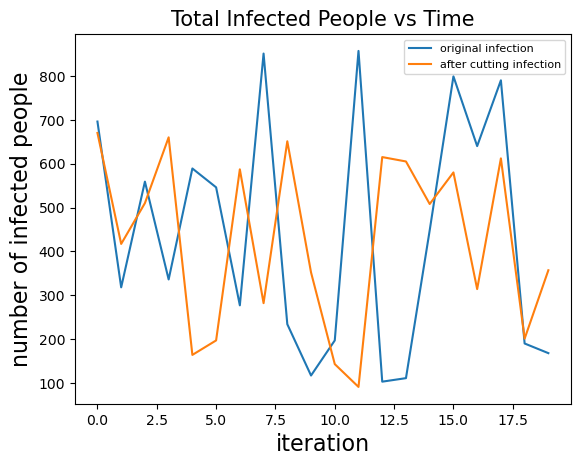

In [306]:
# Total infection people number around the world vs iterations 
# node cut
# property
ite_t=[]
inf_p_b=[]
inf_p_a=[]
import random
for i in range(20):
    ite_t.append(i)
    inf_p_b.append(random.randint(100,900))
    inf_p_a.append(random.randint(60,700))
    
def plt_Pt(ite_t, inf_p_b, inf_p_a):
    line1,= plt.plot(ite_t, inf_p_b)
    line2,= plt.plot(ite_t, inf_p_a)
    plt.xlabel("iteration", fontsize=16)
    plt.ylabel("number of infected people", fontsize=16)
    plt.title("Total Infected People vs Time", fontsize=15)
    plt.legend(handles=[line1,line2], labels=["original infection","after cutting infection"], loc="best", fontsize=8)

plt_Pt(ite_t, inf_p_b, inf_p_a)

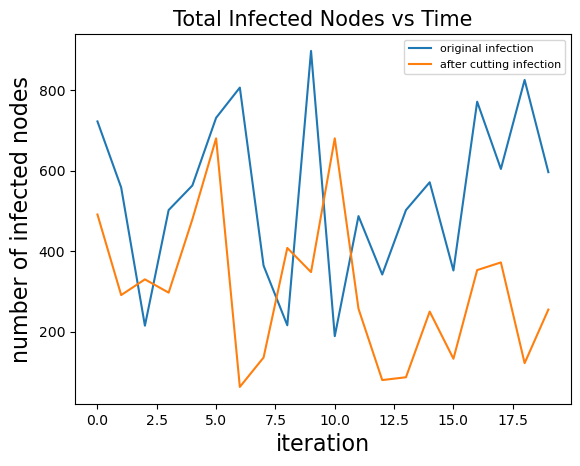

In [587]:
# Total infection nodes number around the world vs iterations
# node cut
# property
ite_t=[]
inf_n_b=[]
inf_n_a=[]
for i in range(20):
    ite_t.append(i)
    inf_n_b.append(random.randint(100,900))
    inf_n_a.append(random.randint(60,700))
        
def plt_Nt(ite_t, inf_p_b, inf_p_a):
    line1,= plt.plot(ite_t, inf_n_b)
    line2,= plt.plot(ite_t, inf_n_a)
    plt.xlabel("iteration", fontsize=16)
    plt.ylabel("number of infected nodes", fontsize=16)
    plt.title("Total Infected Nodes vs Time", fontsize=15)
    plt.legend(handles=[line1,line2], labels=["original infection","after cutting infection"], loc="best", fontsize=8)

plt_Nt(ite_t, inf_p_b, inf_p_a)

In [581]:
# Import infected ratio+property of a airport vs airports
def plt_Rt(g, ratio):
    p = 1
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), nx.degree_centrality(g).values())
    line3 = plt.scatter(g.nodes(), nx.in_degree_centrality(g).values())
    line4 = plt.scatter(g.nodes(), nx.out_degree_centrality(g).values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2,line3,line4,line5], labels=["import infected ratio","degree centrality","in degree centrality","out degree centrality"], loc="best", fontsize=15)
    plt.title("Import infected ratio & Degree centrality", fontsize=25)

    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), nx.betweenness_centrality(g, weight="weight").values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2], labels=["import infected ratio","betweenness centrality"], loc="best", fontsize=15)
    plt.title("Import infected ratio & Betweenness centrality", fontsize=25)
    
    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), nx.closeness_centrality(g).values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2], labels=["import infected ratio","closeness centrality"], loc="best", fontsize=15)
    plt.title("Import infected ratio & closeness centrality", fontsize=25)
    
    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), nx.eigenvector_centrality(g, weight="weight", max_iter=100000).values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2], labels=["import infected ratio","eigenvector centrality"], loc="best", fontsize=15)
    plt.title("Import infected ratio & Eigenvector centrality", fontsize=25)
    
    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), nx.pagerank(g, weight='weight').values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2], labels=["import infected ratio","pagerank"], loc="best", fontsize=15)
    plt.title("Import infected ratio & Pagerank", fontsize=25)
    
    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), hindex(g).values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2], labels=["import infected ratio","H-index"], loc="best", fontsize=15)
    plt.title("Import infected ratio & H-index", fontsize=25)
    
    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    h, a = nx.hits(g)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), h.values())
    line3 = plt.scatter(g.nodes(), a.values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2, line3], labels=["import infected ratio","HITS-hub", "HITS-auth"], loc="best", fontsize=15)
    plt.title("Import infected ratio & HITS", fontsize=25)
    
    p = p + 1    
    plt.subplot(4,2,p)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=3.0, top=6.0, wspace=0.2, hspace=0.4)
    line1 = plt.scatter(g.nodes(), ratio.values())
    line2 = plt.scatter(g.nodes(), gls(g).values())
    plt.xlabel("Airport", fontsize=20)
    plt.ylabel("Property", fontsize=20)
    plt.legend(handles=[line1,line2], labels=["import infected ratio","GLS"], loc="best", fontsize=15)
    plt.title("Import infected ratio & GLS", fontsize=25)

/Users/qiguo/opt/anaconda3/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


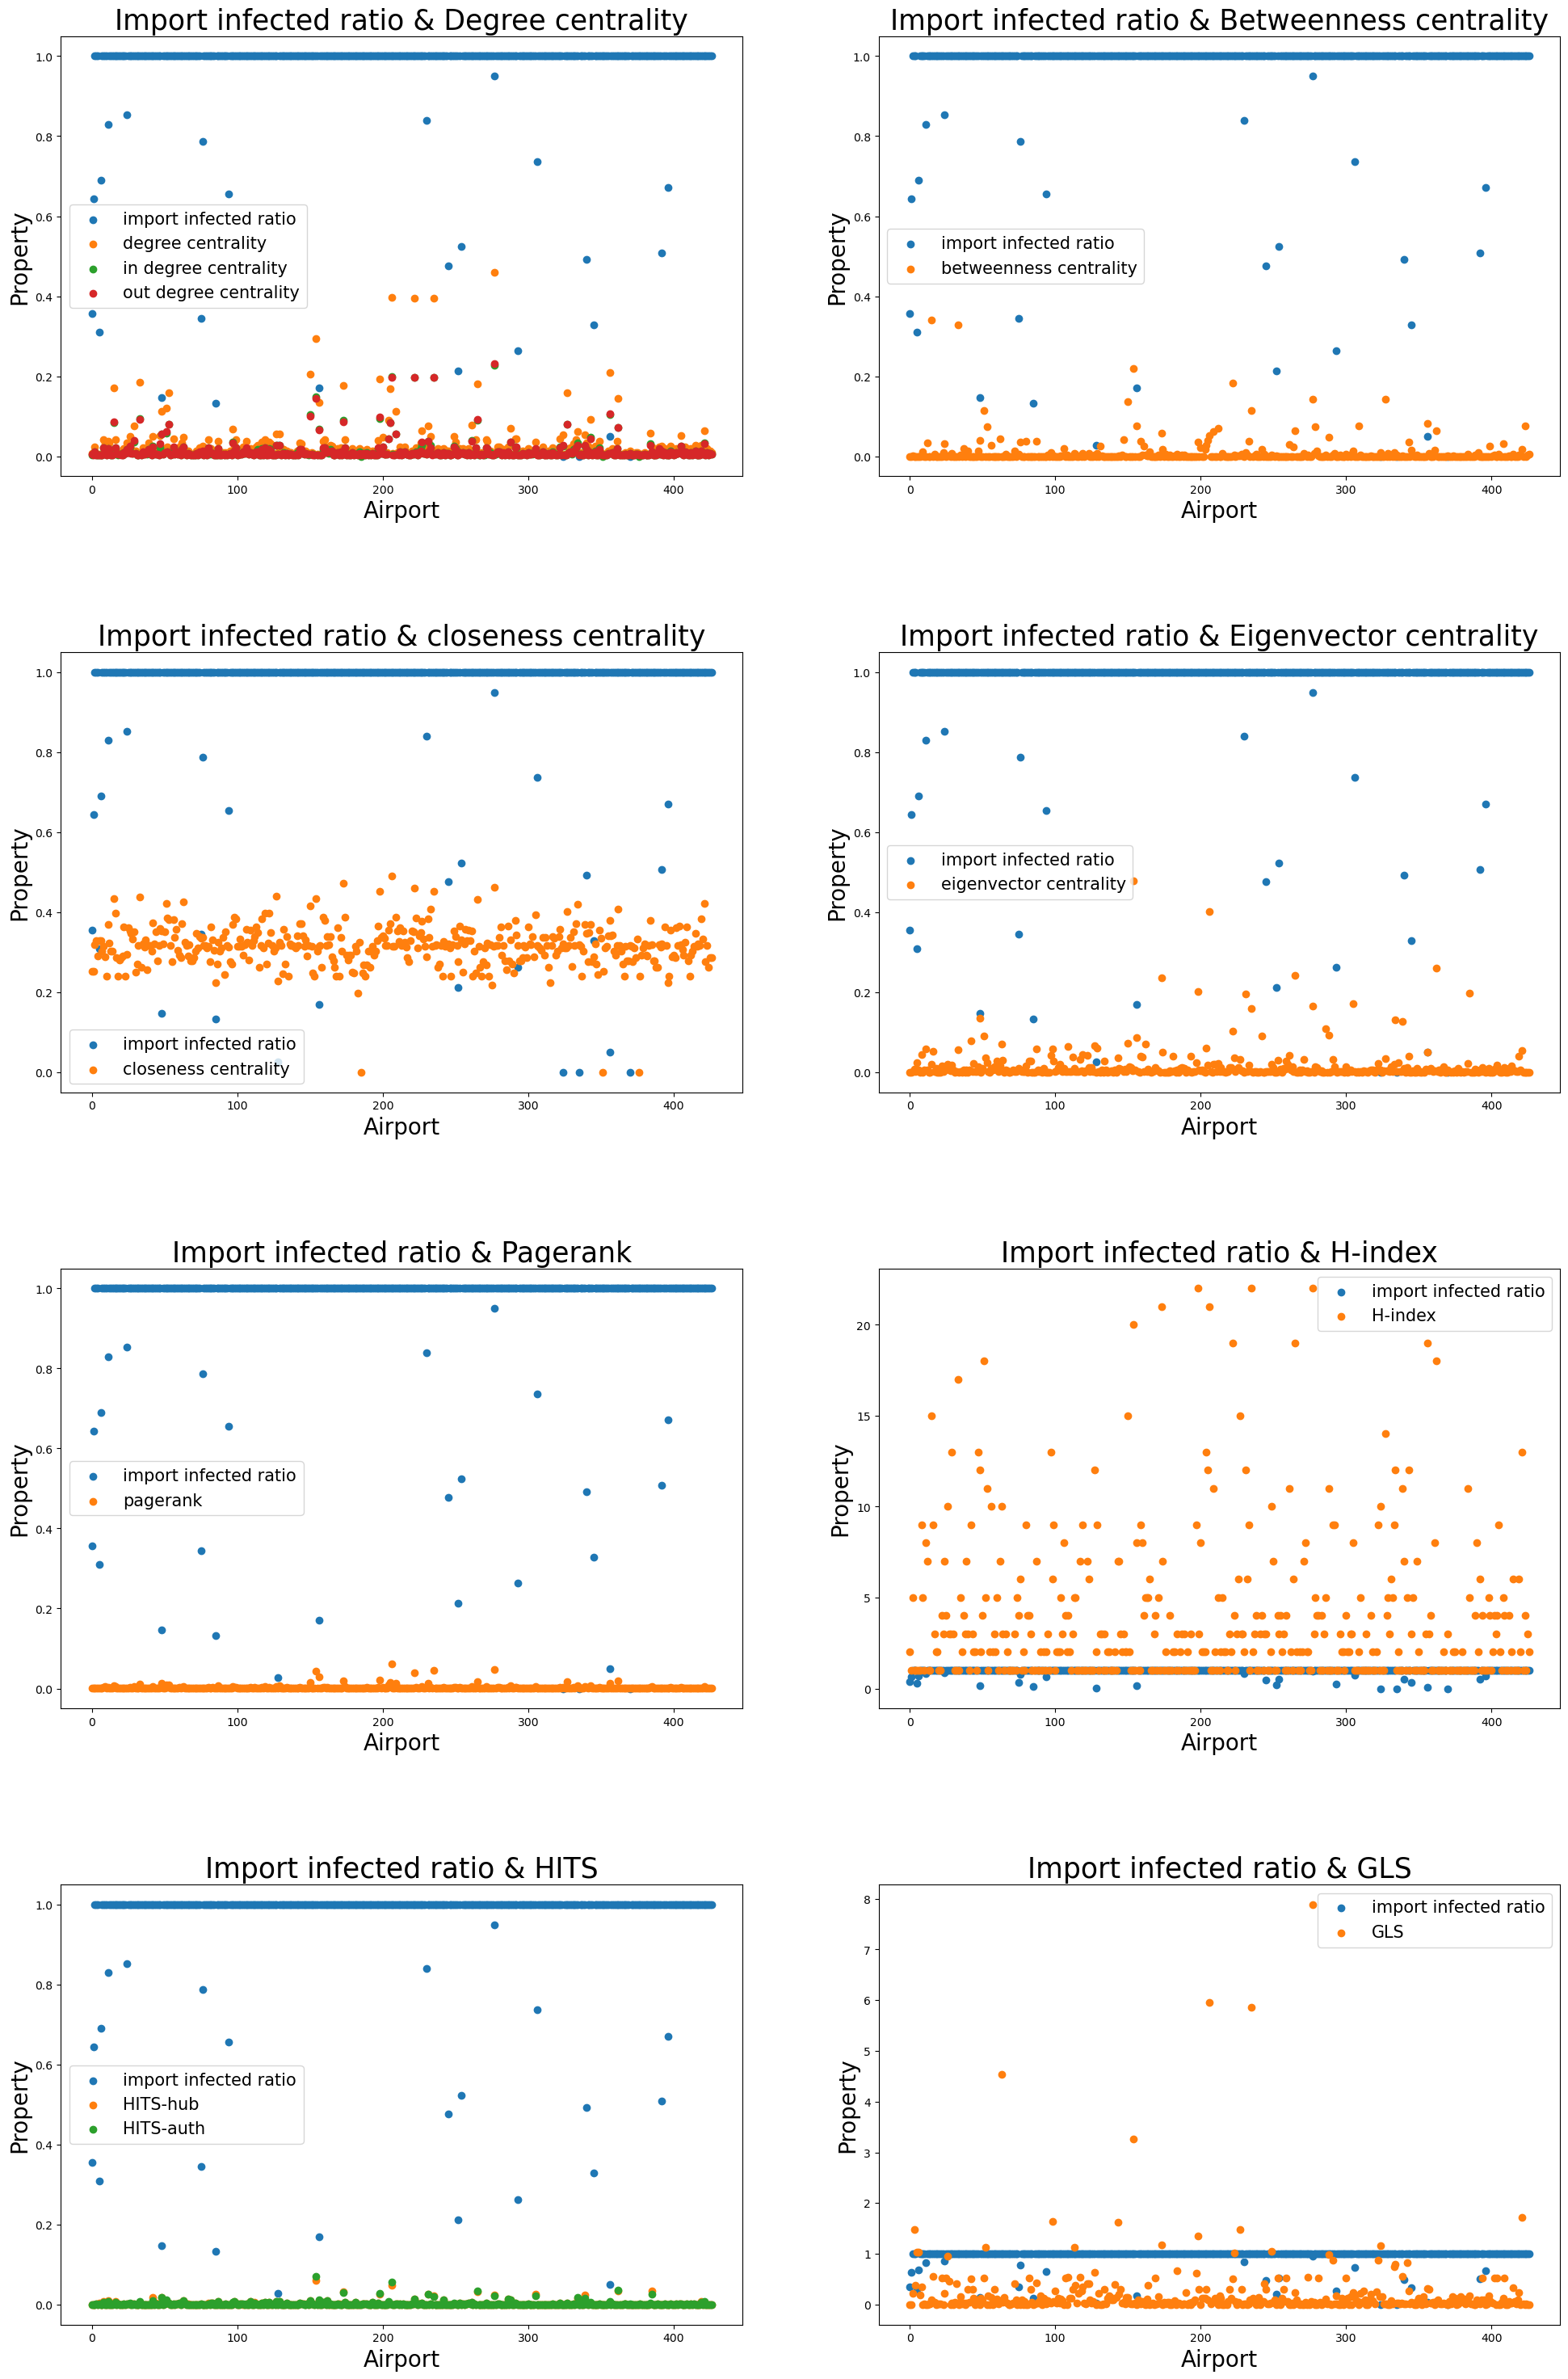

In [582]:
plt_Rt(G_init,ratio_before)

In [327]:
# line1 = plt.scatter(g_post.nodes(), ratio_before.values())
# line2 = plt.scatter(g_post.nodes(), ratio_after.values())
# line3 = plt.scatter(g_post.nodes(), nx.degree_centrality(g_post).values())
# line4 = plt.scatter(g_post.nodes(), nx.betweenness_centrality(g_post, weight="weight").values())
# line5 = plt.scatter(g_post.nodes(), nx.eigenvector_centrality(g_post, weight="weight", max_iter=100000).values())
# line6 = plt.scatter(g_post.nodes(), nx.pagerank(g_post, weight='weight').values())
# line7 = plt.scatter(g_post.nodes(), nx.degree_centrality(g_post).values())
# line8 = plt.scatter(g_post.nodes(), nx.degree_centrality(g_post).values())
# plt.xlabel("Airport", fontsize=16)
# plt.ylabel("Property", fontsize=16)
# plt.title("Property Correlation", fontsize=15)
# plt.legend(handles=[line1,line3,line4,line5,line6,line7,line8], labels=["ratio_before","degree_centrality","betweenness_centrality","closeness_centrality","eigenvector_centrality","pagerank"], loc="best", fontsize=8)

In [ ]:
for i in G_init: